Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\AI_LAB\tensorflow_datasets\mnist\incomplete.Q9GESC_3.0.1\mnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\AI_LAB\tensorflow_datasets\mnist\incomplete.Q9GESC_3.0.1\mnist-test.tfrecord*...:   0%|    …

Dataset mnist downloaded and prepared to C:\Users\AI_LAB\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.
Available splits: dict_keys([Split('train'), Split('test')])
Dataset loaded and preprocessed successfully!
Training started...
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - accuracy: 0.9866 - loss: 0.0380 - val_accuracy: 0.9969 - val_loss: 0.0074
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


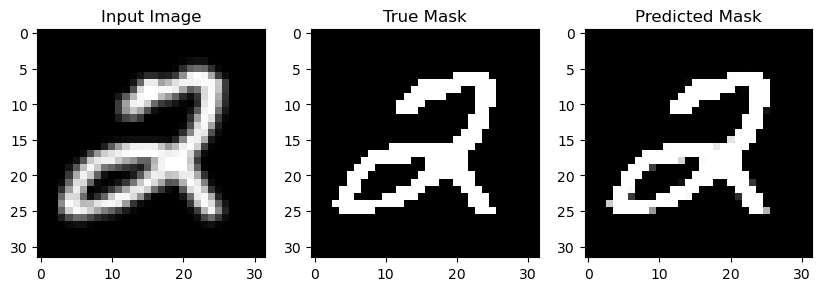

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the MNIST dataset
dataset, info = tfds.load("mnist", with_info=True, as_supervised=True)

print("Available splits:", dataset.keys())  # Should print ['train', 'test']

# Preprocessing function (convert to segmentation format)
def normalize(input_image, input_mask):
    input_image = tf.image.resize(input_image, (32, 32)) / 255.0  # Resize to 32x32 for faster training
    input_mask = tf.where(input_image > 0.5, 1, 0)  # Convert image to binary mask
    return input_image, input_mask

def load_image(image, label):  # Ignore label since MNIST is normally classification
    return normalize(tf.cast(image, tf.float32), tf.cast(image, tf.uint8))

# Prepare dataset with a smaller batch size and resized images
train_data = dataset['train'].map(load_image).shuffle(1000).batch(8)  # Reduced batch size to 8
test_data = dataset['test'].map(load_image).batch(8)

print("Dataset loaded and preprocessed successfully!")

# Define a very simple CNN model (further reduced complexity)
def simple_cnn():
    inputs = tf.keras.layers.Input(shape=(32, 32, 1))  # Adjusted for 32x32 input

    # A very simple CNN with fewer filters
    conv1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = tf.keras.layers.MaxPooling2D((2, 2))(conv1)

    conv2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = tf.keras.layers.MaxPooling2D((2, 2))(conv2)

    conv3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool2)

    # Decoder (use transpose convolution for upsampling)
    up4 = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(conv3)
    concat4 = tf.keras.layers.Concatenate()([up4, conv2])

    up5 = tf.keras.layers.Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same', activation='relu')(concat4)
    concat5 = tf.keras.layers.Concatenate()([up5, conv1])

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(concat5)  # Binary segmentation

    model = tf.keras.Model(inputs, outputs)
    return model

# Compile model
model = simple_cnn()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model with fewer epochs for faster results
print("Training started...")
model.fit(train_data, epochs=1, validation_data=test_data)  # Reduced to 1 epoch for faster results

# Predict and visualize
def display_sample(dataset):
    for image, mask in dataset.take(1):
        pred_mask = model.predict(image)
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(image[0, :, :, 0], cmap='gray')
        plt.title("Input Image")

        plt.subplot(1, 3, 2)
        plt.imshow(mask[0, :, :, 0], cmap='gray')
        plt.title("True Mask")

        plt.subplot(1, 3, 3)
        plt.imshow(pred_mask[0, :, :, 0], cmap='gray')
        plt.title("Predicted Mask")

        plt.show()
        break

# Visualize results
display_sample(test_data)

C:\Users\AI_LAB\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training started...
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9329 - loss: 0.2119 - val_accuracy: 0.9841 - val_loss: 0.0497
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


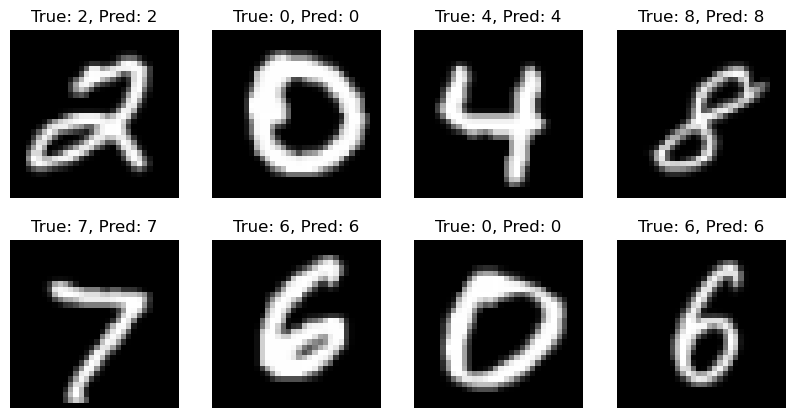

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the MNIST dataset
dataset, info = tfds.load("mnist", with_info=True, as_supervised=True)

# Preprocess images
def preprocess(image, label):
    image = tf.image.resize(image, (32, 32)) / 255.0  # Normalize pixel values
    return image, label

# Prepare the dataset
train_data = dataset['train'].map(preprocess).shuffle(1000).batch(8)
test_data = dataset['test'].map(preprocess).batch(8)

# Define a simple CNN for digit classification
def build_cnn():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
    ])
    return model

# Compile and train the model
model = build_cnn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Training started...")
model.fit(train_data, epochs=1, validation_data=test_data)  # Train for 1 epoch

# Display sample predictions
def display_sample_predictions(dataset):
    for image_batch, label_batch in dataset.take(1):
        predictions = model.predict(image_batch)
        plt.figure(figsize=(10, 5))

        for i in range(8):  # Show predictions for the first 8 samples
            plt.subplot(2, 4, i + 1)
            plt.imshow(image_batch[i, :, :, 0], cmap='gray')
            plt.title(f"True: {label_batch[i]}, Pred: {tf.argmax(predictions[i])}")
            plt.axis('off')

        plt.show()
        break

# Visualize predictions
display_sample_predictions(test_data)
